# ***Diabetes prediction***

# **Import libraries**

In [1]:
# Import libraries


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from scipy import stats
from scipy.stats import uniform, randint

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from mlxtend.plotting import plot_confusion_matrix
from sklearn.linear_model import LogisticRegressionCV

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.utils import shuffle
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score , classification_report,ConfusionMatrixDisplay,precision_score,recall_score, f1_score,roc_auc_score,roc_curve, balanced_accuracy_score

from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
print('done importing')

done importing


In [46]:
dia_df = pd.read_csv("/kaggle/input/health-dataset/diabetes_data.csv")
dia_df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
#get column names
dia_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

In [48]:
#select variables that are medically likely to predict diabetes
df = dia_df[["Age","Sex","HighChol","BMI","Smoker","PhysActivity","PhysHlth","Fruits","Veggies","HvyAlcoholConsump","Stroke","HighBP","Diabetes"]]
df.head()

,Age,Sex,HighChol,BMI,Smoker,PhysActivity,PhysHlth,Fruits,Veggies,HvyAlcoholConsump,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,26.0,0.0,1.0,30.0,0.0,1.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,26.0,0.0,1.0,10.0,1.0,1.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,28.0,1.0,1.0,3.0,1.0,1.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


# **Brief data exploration**

In [9]:
df.shape

(70692, 13)

In [49]:
#check unique values

unique_values = {}
for col in df.columns:
    unique_values[col] = df[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
Age,13
Sex,2
HighChol,2
BMI,80
Smoker,2
PhysActivity,2
PhysHlth,31
Fruits,2
Veggies,2
HvyAlcoholConsump,2


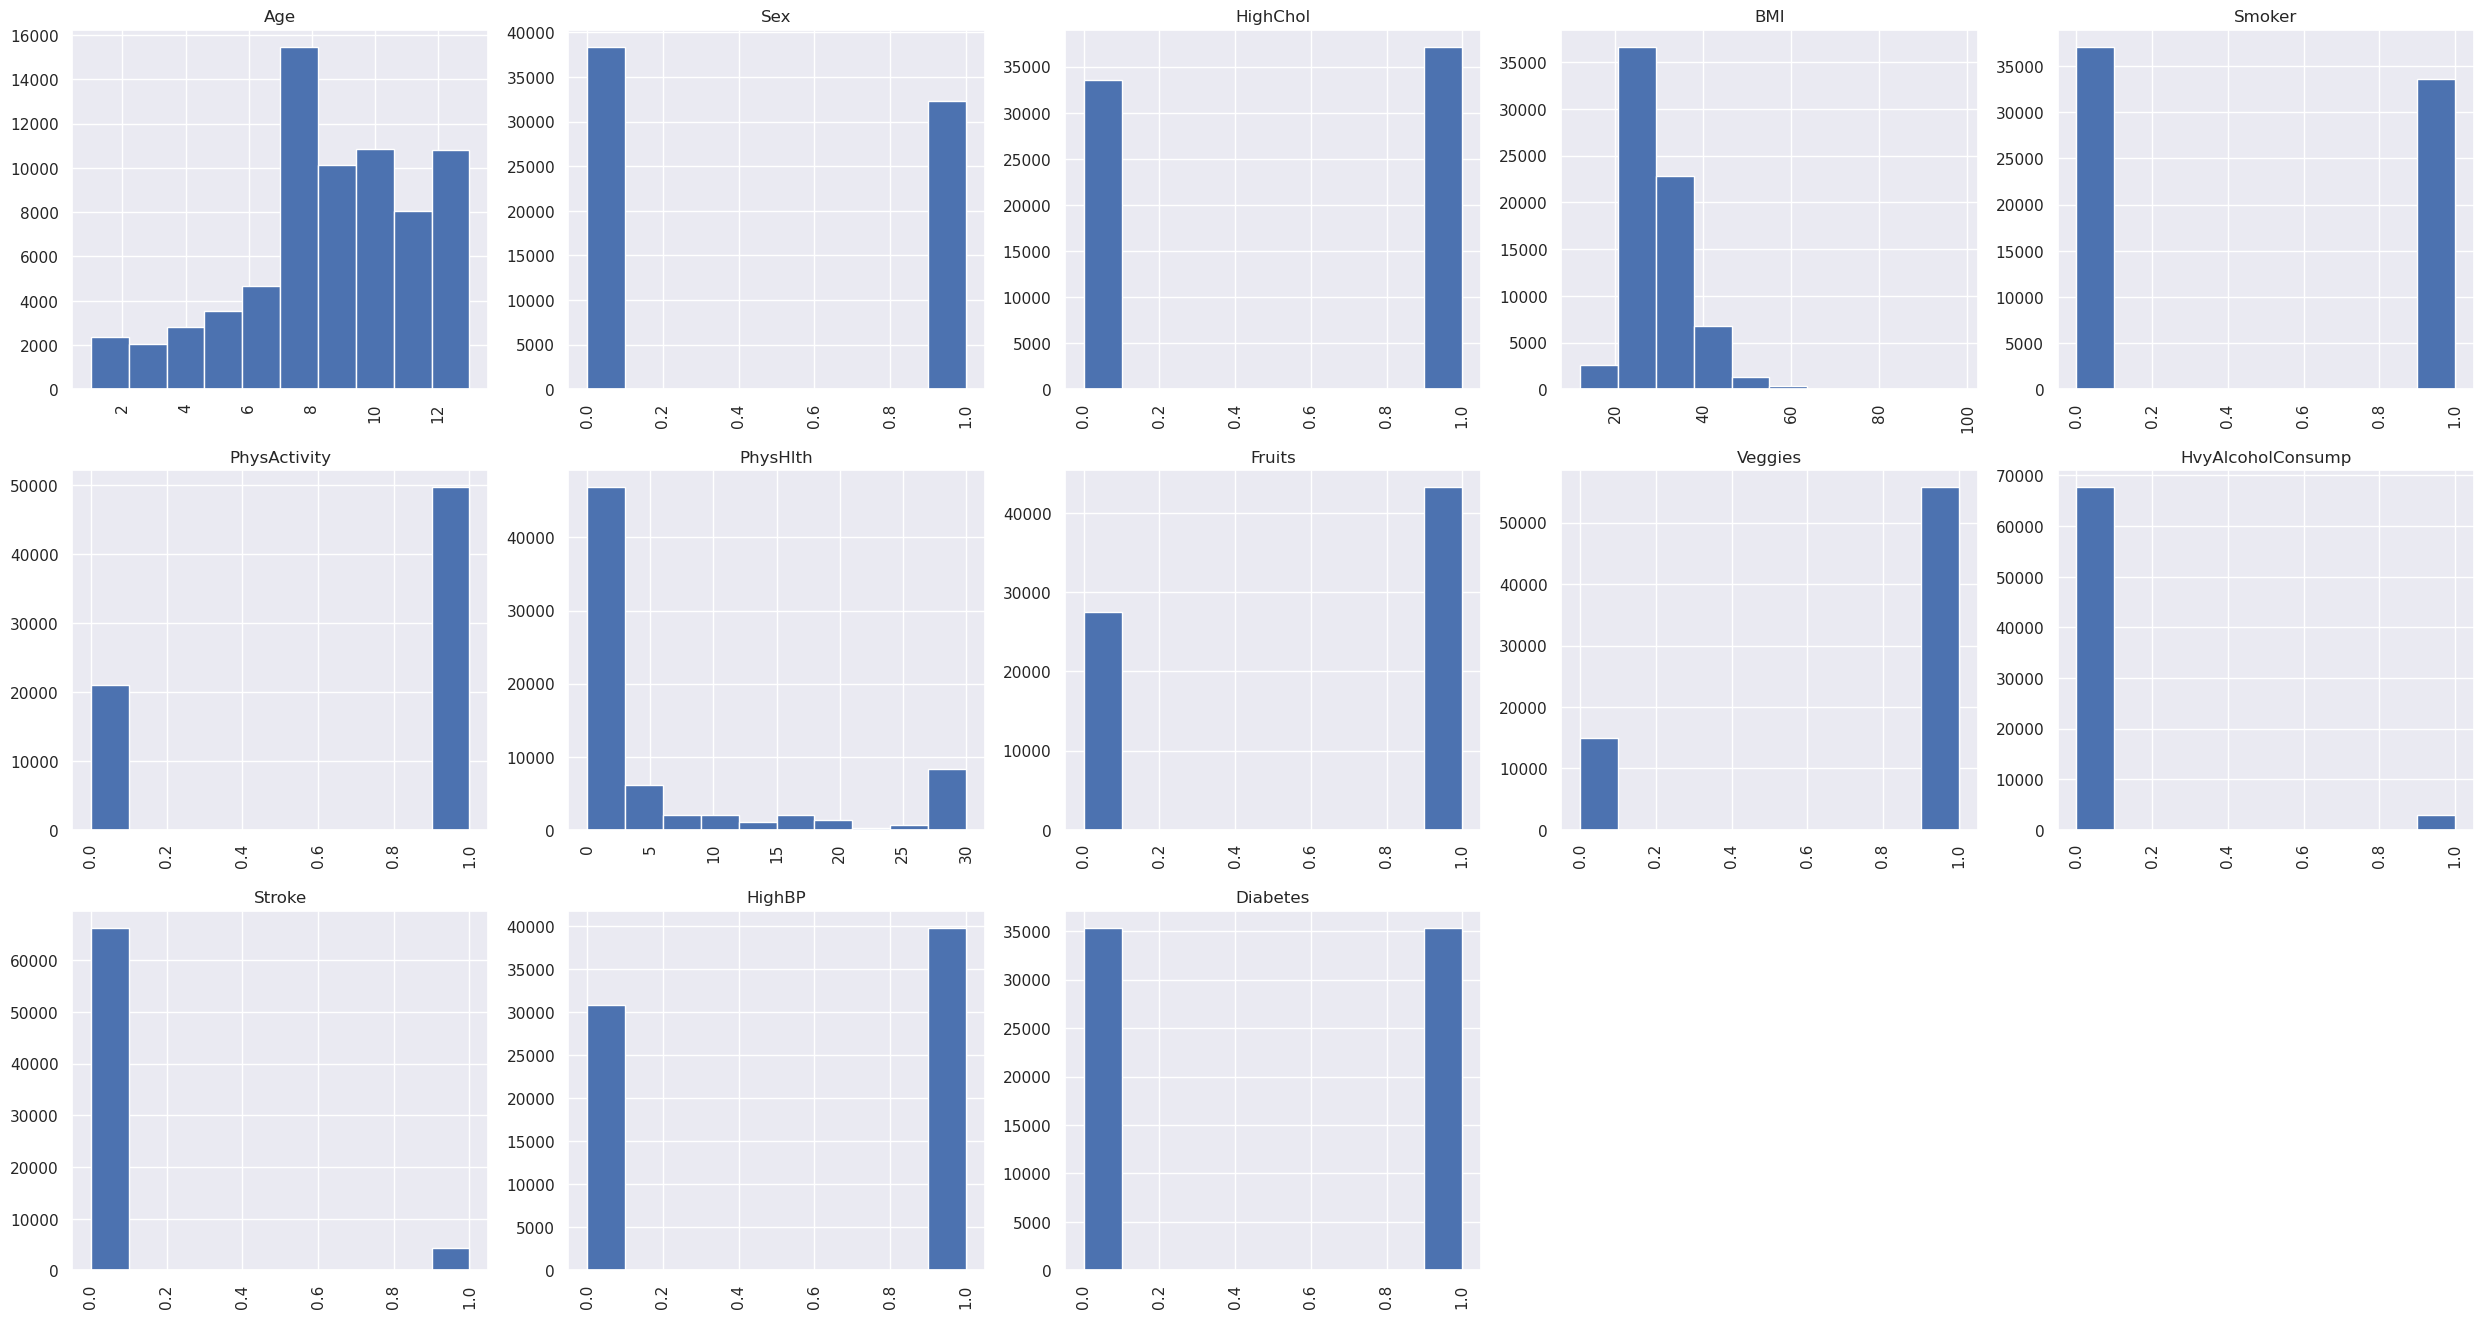

In [50]:
#check frequency of all values in the column

# All data columns except for color
feature_cols = [x for x in df.columns if x not in 'stroke']
plt.figure(figsize=(25,35))
# loop for subplots
for i in range(len(feature_cols)):
    plt.subplot(8,5,i+1)
    plt.title(feature_cols[i])
    plt.xticks(rotation=90)
    plt.hist(df[feature_cols[i]])
    
plt.tight_layout()

In [51]:
#we should drop the columns with very small categories- (HvyAlcoholConsump and stroke)
df.drop(['HvyAlcoholConsump','Stroke'], axis=1, inplace=True)

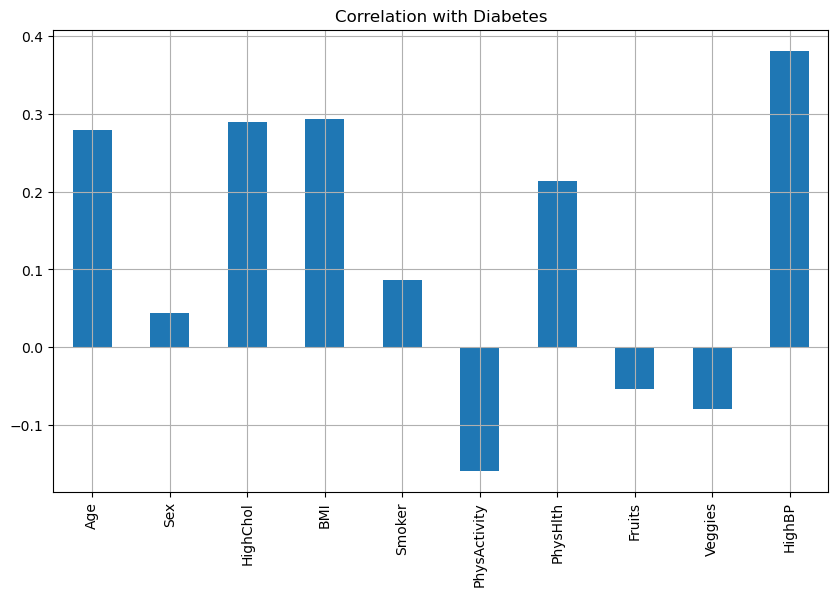

In [15]:
#check correlation of other columns with diabetes column
df.drop('Diabetes', axis=1).corrwith(df.Diabetes).plot(kind='bar', grid=True, figsize=(10, 6), title="Correlation with Diabetes");

In [16]:
#variables with correlation less than 0.1 are Sex, Smoker, Fruits, Veggies

<AxesSubplot:>

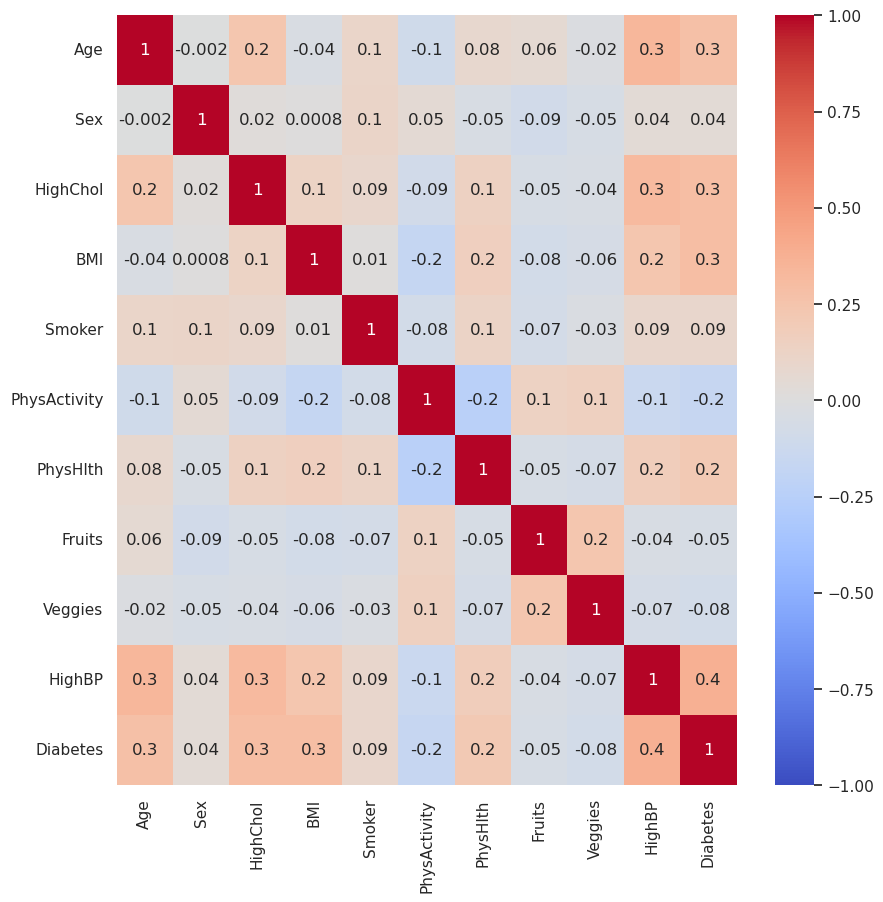

In [17]:
# Correlation between any two features
# check for possible co-variates

sns.set(rc = {'figure.figsize':(10,10)})
sns.heatmap(df.corr(),vmin=-1, vmax=1, annot = True, fmt='.1g',cmap= 'coolwarm')

In [52]:
#drop the variables with low correlations Sex, Smoker, Fruits, Veggies
df.drop(['Sex','Smoker','Fruits','Veggies'], axis=1, inplace=True)

In [19]:
df.head()

,Age,HighChol,BMI,PhysActivity,PhysHlth,HighBP,Diabetes
0,4.0,0.0,26.0,1.0,30.0,1.0,0.0
1,12.0,1.0,26.0,0.0,0.0,1.0,0.0
2,13.0,0.0,26.0,1.0,10.0,0.0,0.0
3,11.0,1.0,28.0,1.0,3.0,1.0,0.0
4,8.0,0.0,29.0,1.0,0.0,0.0,0.0


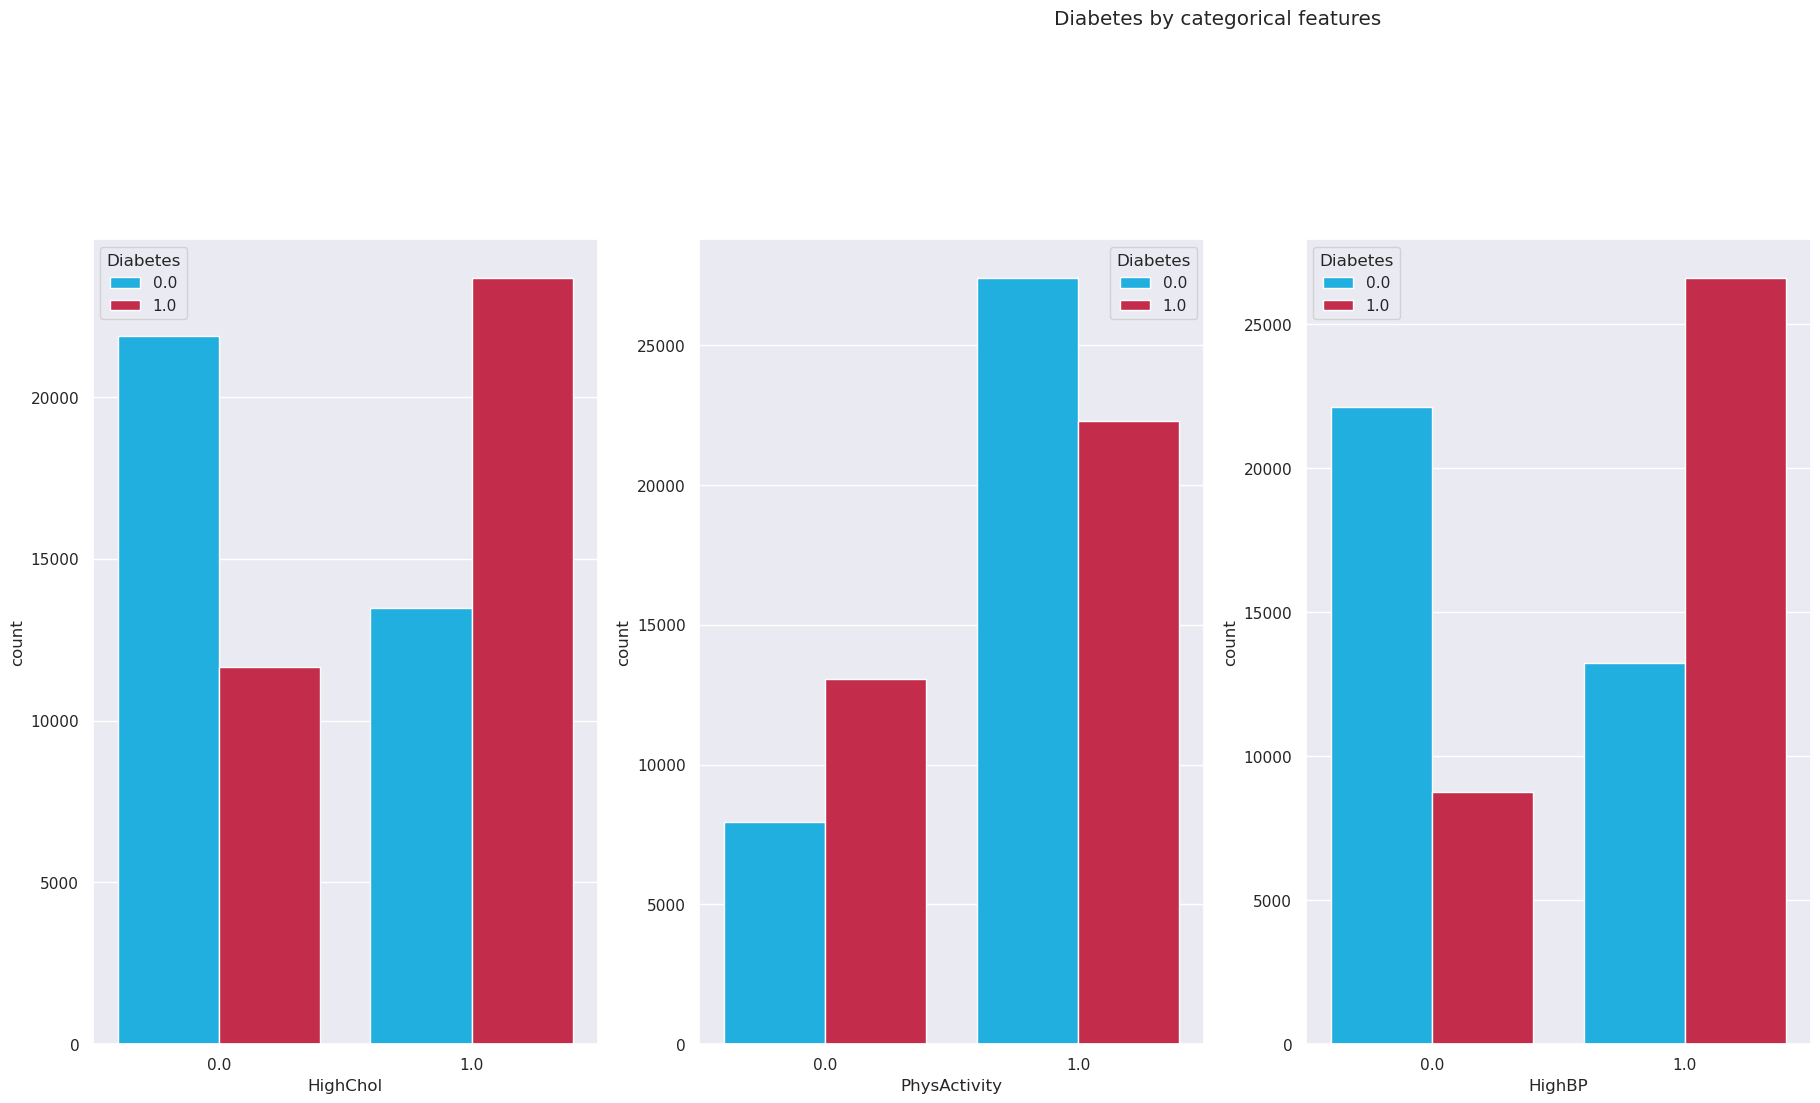

In [24]:
# Bivariate bar plot for categorical variables

features = [x for x in df.columns if x in ['HighChol', 'PhysActivity', 'HighBP']]
plt.figure(figsize = (30,23))
plt.suptitle('Diabetes by categorical features')

#subplots
for i in enumerate(features):
    plt.subplot(2,4, i[0]+1)   
    sns.countplot(data=df, x=i[1], hue='Diabetes', palette = ['deepskyblue','crimson'])

<Figure size 1200x500 with 0 Axes>

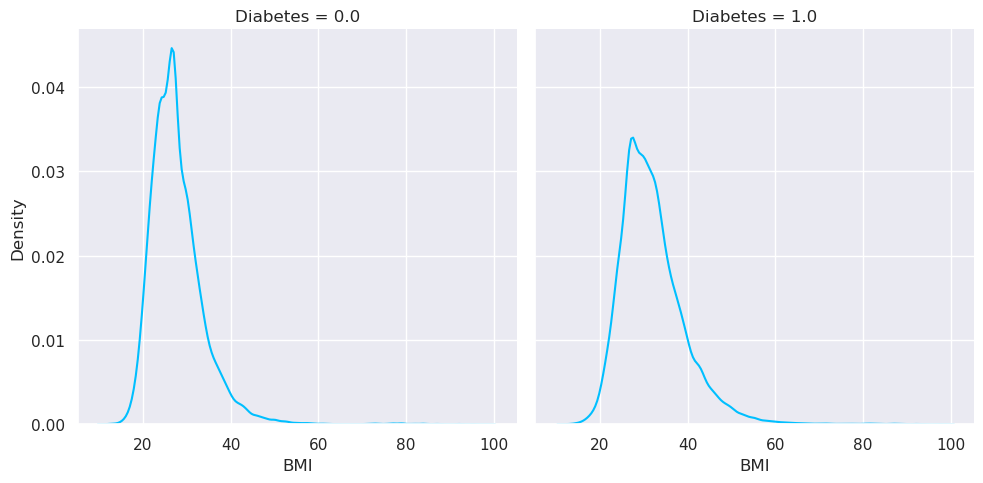

In [25]:
#for numeric variables
plt.figure(figsize=(12,5))
sns.displot(x='BMI', col='Diabetes' , data = df, kind="kde" ,color = 'deepskyblue')

<Figure size 1200x2000 with 0 Axes>

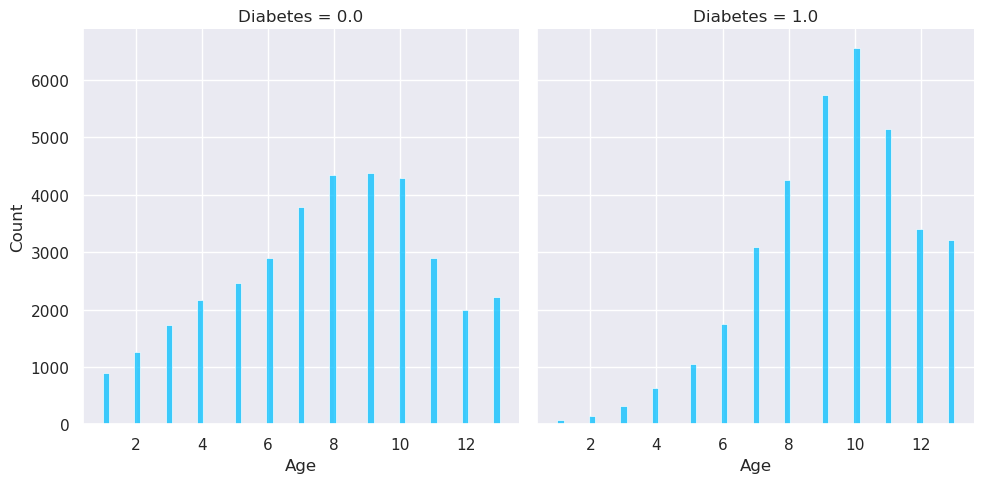

In [26]:
plt.figure(figsize=(12,20))
sns.displot(data=df,col='Diabetes',x='Age',color='deepskyblue')

# **Data transformation**

In [53]:
#Check skewness

df_skew = df[['Age','BMI','PhysHlth']]
skew = pd.DataFrame(df_skew.skew())
skew.columns = ['skew']
skew['too_skewed'] = skew['skew'] > .75
skew

,skew,too_skewed
Age,-0.545923,False
BMI,1.719180,True
PhysHlth,1.657304,True


In [54]:
#Scaling the data for features selection using the MinMaxScaler method.
#only numeric variables apply here

mms = MinMaxScaler()
df[['BMI']] = mms.fit_transform(df[['BMI']])
df[['Age']] = mms.fit_transform(df[['Age']])
df[['PhysHlth']] = mms.fit_transform(df[['PhysHlth']])
df.head()

,Age,HighChol,BMI,PhysActivity,PhysHlth,HighBP,Diabetes
0,0.250000,0.0,0.162791,1.0,1.000000,1.0,0.0
1,0.916667,1.0,0.162791,0.0,0.000000,1.0,0.0
2,1.000000,0.0,0.162791,1.0,0.333333,0.0,0.0
3,0.833333,1.0,0.186047,1.0,0.100000,1.0,0.0
4,0.583333,0.0,0.197674,1.0,0.000000,0.0,0.0


In [55]:
#use quantile tranformation

qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')
df[['BMI']] = qt.fit_transform(df[['BMI']])
df[['PhysHlth']] = qt.fit_transform(df[['PhysHlth']])

In [56]:
#recheck the skew
df_skew = df[['Age','BMI','PhysHlth']]
skew = pd.DataFrame(df_skew.skew())
skew.columns = ['skew']
skew['too_skewed'] = skew['skew'] > .75
skew

,skew,too_skewed
Age,-0.545923,False
BMI,0.016868,False
PhysHlth,0.693496,False


# **Feature Selection**

In [57]:
#Features selection -step 1
#1. Define X,y
y = (df['Diabetes']).astype(int)
X = df.loc[:, df.columns != 'Diabetes']  # everything except "Diabetes"

[0.15014518 0.10515855 0.34133687 0.02416687 0.13961638 0.23957616]


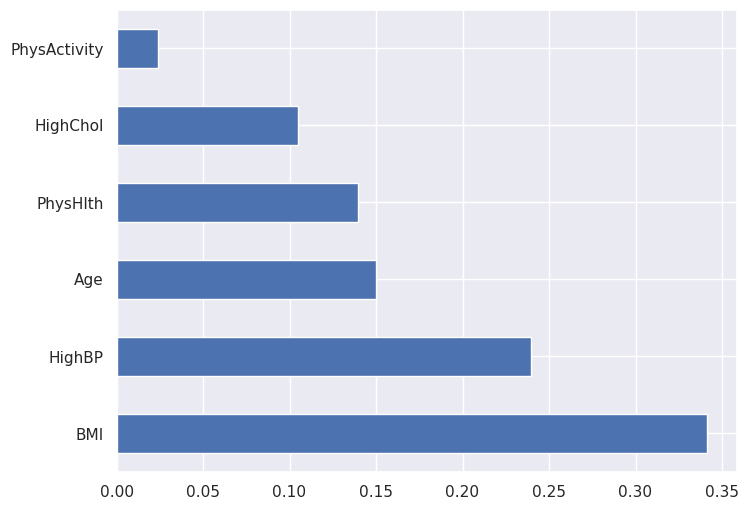

In [31]:
#step 2

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(8,6))
feat_importances.nlargest(6).plot(kind='barh')
plt.show()


In [33]:
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Columns','Score']
print(featureScores.nlargest(6,'Score'))  #print 5 best features

        Columns        Score
5        HighBP  4491.799960
1      HighChol  2804.501278
4      PhysHlth  1864.301775
3  PhysActivity   528.494034
0           Age   490.930094
2           BMI   200.502204


In [35]:
xgbc = xgb.XGBClassifier(random_state = 42)
# Create an EFS object
efs = EFS(estimator=xgbc,       
          min_features=1,      
          max_features=5,      
          scoring='accuracy',  
          cv=4)               

# Train EFS with our dataset
efs = efs.fit(X, y)
# Print the results
print('Best accuracy score: %.2f' % efs.best_score_) # best_score_ shows the best score 
print('Best subset (indices):', efs.best_idx_)       # best_idx_ shows the index of features that yield the best score 
print('Best subset (corresponding names):', efs.best_feature_names_) # best_feature_names_ shows the feature names 

Features: 62/62

Best accuracy score: 0.72
Best subset (indices): (0, 1, 2, 4, 5)
Best subset (corresponding names): ('Age', 'HighChol', 'BMI', 'PhysHlth', 'HighBP')


# **Model building and testing**

In [58]:
#Data splitting

y = (df['Diabetes']).astype(int)
X = df.loc[:, df.columns != 'Diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [59]:
X_train.shape

(49484, 6)

In [41]:
X_test.shape

(21208, 7)

## K Nearest Neighbors

In [60]:
from sklearn.model_selection import GridSearchCV
# defining parameter range
param_grid = {'n_neighbors': [1,3,5,7,9,11,13,15,17,19],
              'weights': ['distance', 'uniform']}  
gridKNN = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
gridKNN.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ...n_neighbors=1, weights=distance;, score=0.636 total time=   0.2s
[CV 2/5] END ...n_neighbors=1, weights=distance;, score=0.646 total time=   0.2s
[CV 3/5] END ...n_neighbors=1, weights=distance;, score=0.640 total time=   0.2s
[CV 4/5] END ...n_neighbors=1, weights=distance;, score=0.641 total time=   0.2s
[CV 5/5] END ...n_neighbors=1, weights=distance;, score=0.641 total time=   0.2s
[CV 1/5] END ....n_neighbors=1, weights=uniform;, score=0.636 total time=   0.4s
[CV 2/5] END ....n_neighbors=1, weights=uniform;, score=0.646 total time=   0.3s
[CV 3/5] END ....n_neighbors=1, weights=uniform;, score=0.640 total time=   0.3s
[CV 4/5] END ....n_neighbors=1, weights=uniform;, score=0.641 total time=   0.4s
[CV 5/5] END ....n_neighbors=1, weights=uniform;, score=0.641 total time=   0.3s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.659 total time=   0.2s
[CV 2/5] END ...n_neighbors=3, weights=distance

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19],
                         'weights': ['distance', 'uniform']},
             verbose=3)

In [61]:
print(gridKNN.best_params_)

{'n_neighbors': 19, 'weights': 'uniform'}


In [62]:
#predict with the best parameter
y_pred_test = gridKNN.predict(X_test)
y_pred_train = gridKNN.predict(X_train)

In [63]:
#Check accuracy and overfitting
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.7342373292377334
0.7132685778951339


<Figure size 500x500 with 0 Axes>

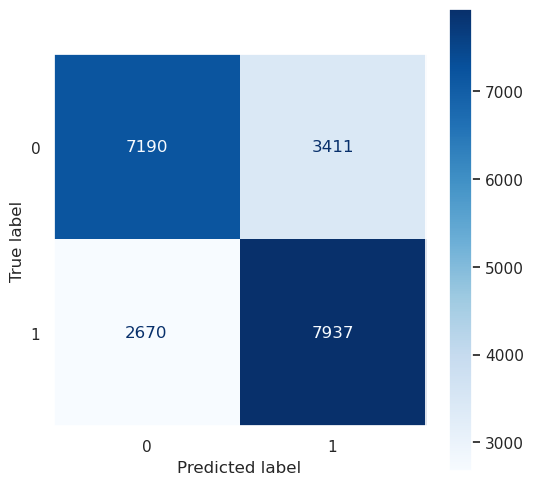

In [64]:
#confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_test, labels=gridKNN.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=gridKNN.classes_)
fig = plt.figure(figsize=(5, 5))
disp.plot(cmap=plt.cm.Blues) 
plt.grid(which='major')     
plt.gcf().set_size_inches(6, 6) 
plt.show()

In [38]:
#model metrics

#function that get y_test and calculate into df all the relevant metric
def train_evaluate_model(y_test):
    #fit the model instance 
    predictions = y_pred_test # calculate predictions

    #compute metrics for evaluation
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    balanced_accuracy = balanced_accuracy_score(y_test, predictions)
    auc = roc_auc_score(y_test, predictions)

    #create a dataframe to visualize the results
    eval_df = pd.DataFrame([[accuracy, f1, precision, recall, balanced_accuracy, auc]], columns=['accuracy', 'f1_score', 'precision', 'recall', 'balanced_accuracy', 'auc'])
    return eval_df

In [65]:
#model metrics

results = train_evaluate_model(y_test)
results.index = ['K Nearest Neighbors - Method 1']
results.style.background_gradient(cmap = sns.color_palette("blend:green,red", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
K Nearest Neighbors - Method 1,0.713269,0.723024,0.699418,0.748279,0.713259,0.713259


## Decision Tree

In [66]:
dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)

In [67]:
#dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)

# defining parameter range
param_grid = {'max_depth':range(1, dt.tree_.max_depth+1, 2),
              'max_features': range(1, len(dt.feature_importances_)+1)}  
gridDT = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, n_jobs=-1)
  
# fitting the model for grid search
gridDT.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(1, 26, 2),
                         'max_features': range(1, 7)})

In [68]:
print(gridDT.best_params_)

{'max_depth': 7, 'max_features': 4}


In [69]:
y_pred_test = gridDT.predict(X_test)
y_pred_train = gridDT.predict(X_train)

In [70]:
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.7280333036941233
0.7178423236514523


<Figure size 500x500 with 0 Axes>

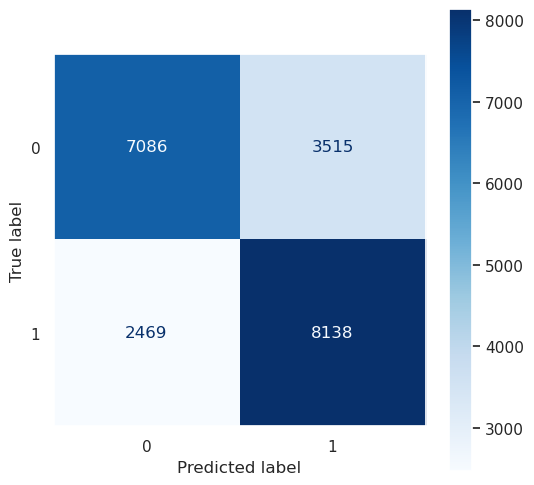

In [71]:
#confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_test, labels=gridDT.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=gridDT.classes_)
fig = plt.figure(figsize=(5, 5))
disp.plot(cmap=plt.cm.Blues) 
plt.grid(which='major')     #remove cell gridlines
plt.gcf().set_size_inches(6, 6)   # Adjust the size of the plot
plt.show()

In [72]:
resultsDT = train_evaluate_model(y_test)
resultsDT.index = ['Decision Trees - Method 2']
results = results.append(resultsDT)
results.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
K Nearest Neighbors - Method 1,0.713269,0.723024,0.699418,0.748279,0.713259,0.713259
Decision Trees - Method 2,0.717842,0.731177,0.698361,0.767229,0.717828,0.717828


## Random Forest

In [73]:
RF = RandomForestClassifier(oob_score=True, 
                            random_state=42, 
                            warm_start=True,
                            n_jobs=-1)

# defining parameter range
param_grid = {'n_estimators':[15, 20, 30, 40, 50, 100, 150, 200, 300, 400]
              }  
gridRF = GridSearchCV(RF, param_grid)
  
# fitting the model for grid search
gridRF.fit(X_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, oob_score=True,
                                              random_state=42,
                                              warm_start=True),
             param_grid={'n_estimators': [15, 20, 30, 40, 50, 100, 150, 200,
                                          300, 400]})

In [74]:
print(gridRF.best_params_)

{'n_estimators': 400}


Prediction according to this model.

In [75]:
y_pred_test = gridRF.predict(X_test)
y_pred_train = gridRF.predict(X_train)

In [76]:
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.8024411931129254
0.693794794417201


<Figure size 500x500 with 0 Axes>

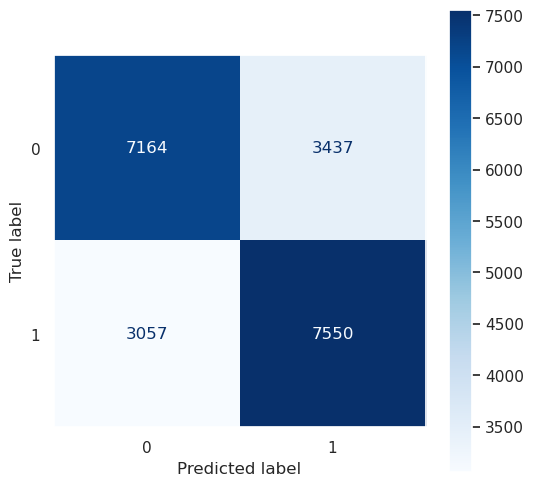

In [77]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_test, labels=gridRF.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=gridRF.classes_)
fig = plt.figure(figsize=(5, 5))
disp.plot(cmap=plt.cm.Blues) 
plt.grid(which='major')     #remove cell gridlines
plt.gcf().set_size_inches(6, 6)   # Adjust the size of the plot
plt.show()

In [78]:
resultsRF = train_evaluate_model(y_test)
resultsRF.index = ['Random Forest - Method 3']
results = results.append(resultsRF)
results.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
K Nearest Neighbors - Method 1,0.713269,0.723024,0.699418,0.748279,0.713259,0.713259
Decision Trees - Method 2,0.717842,0.731177,0.698361,0.767229,0.717828,0.717828
Random Forest - Method 3,0.693795,0.699268,0.687176,0.711794,0.693790,0.693790


### XGBoost CLassifier

In [79]:

xgbc = xgb.XGBClassifier()

params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}
search = RandomizedSearchCV(xgbc, param_distributions=params,
                            random_state = 42, n_iter = 200, cv = 4,
                            verbose = 1, n_jobs = -1, return_train_score = True)
  
search.fit(X_train, y_train)
print(search.best_params_)

Fitting 4 folds for each of 200 candidates, totalling 800 fits
{'colsample_bytree': 0.7302334004132279, 'gamma': 0.009110912825774864, 'learning_rate': 0.05833288822677851, 'max_depth': 4, 'n_estimators': 122, 'subsample': 0.6284754593840916}


In [80]:
y_pred_test = search.predict(X_test)
y_pred_train = search.predict(X_train)

In [81]:
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.7312262549510953
0.7276970954356846


<Figure size 500x500 with 0 Axes>

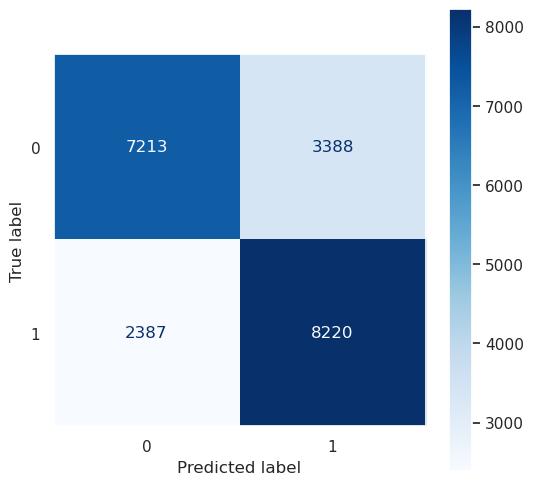

In [82]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_test, labels=gridRF.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=gridRF.classes_)
fig = plt.figure(figsize=(5, 5))
disp.plot(cmap=plt.cm.Blues) 
plt.grid(which='major')     #remove cell gridlines
plt.gcf().set_size_inches(6, 6)   # Adjust the size of the plot
plt.show()

In [83]:
resultsXGB = train_evaluate_model(y_test)
resultsXGB.index = ['XGBoostClassifier - Method 4']
results = results.append(resultsXGB)
results.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
K Nearest Neighbors - Method 1,0.713269,0.723024,0.699418,0.748279,0.713259,0.713259
Decision Trees - Method 2,0.717842,0.731177,0.698361,0.767229,0.717828,0.717828
Random Forest - Method 3,0.693795,0.699268,0.687176,0.711794,0.693790,0.693790
XGBoostClassifier - Method 4,0.727697,0.740041,0.708132,0.774960,0.727684,0.727684


# ***Stroke Prediction***

In [2]:
df = pd.read_csv('/kaggle/input/health-dataset/stroke_data.csv')

In [3]:
df.head()

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1.0,63.0,0,1,1,4,1,228.69,36.6,1,1
1,1.0,42.0,0,1,1,4,0,105.92,32.5,0,1
2,0.0,61.0,0,0,1,4,1,171.23,34.4,1,1
3,1.0,41.0,1,0,1,3,0,174.12,24.0,0,1
4,1.0,85.0,0,0,1,4,1,186.21,29.0,1,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40910 entries, 0 to 40909
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                40907 non-null  float64
 1   age                40910 non-null  float64
 2   hypertension       40910 non-null  int64  
 3   heart_disease      40910 non-null  int64  
 4   ever_married       40910 non-null  int64  
 5   work_type          40910 non-null  int64  
 6   Residence_type     40910 non-null  int64  
 7   avg_glucose_level  40910 non-null  float64
 8   bmi                40910 non-null  float64
 9   smoking_status     40910 non-null  int64  
 10  stroke             40910 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 3.4 MB


## Brief data exploration

In [5]:
df.shape

(40910, 11)

In [6]:
unique_values = {}
for col in df.columns:
    unique_values[col] = df[col].value_counts().shape[0]

pd.DataFrame(unique_values, index=['unique value count']).transpose()

,unique value count
sex,2
age,111
hypertension,2
heart_disease,2
ever_married,2
work_type,5
Residence_type,2
avg_glucose_level,2903
bmi,370
smoking_status,2


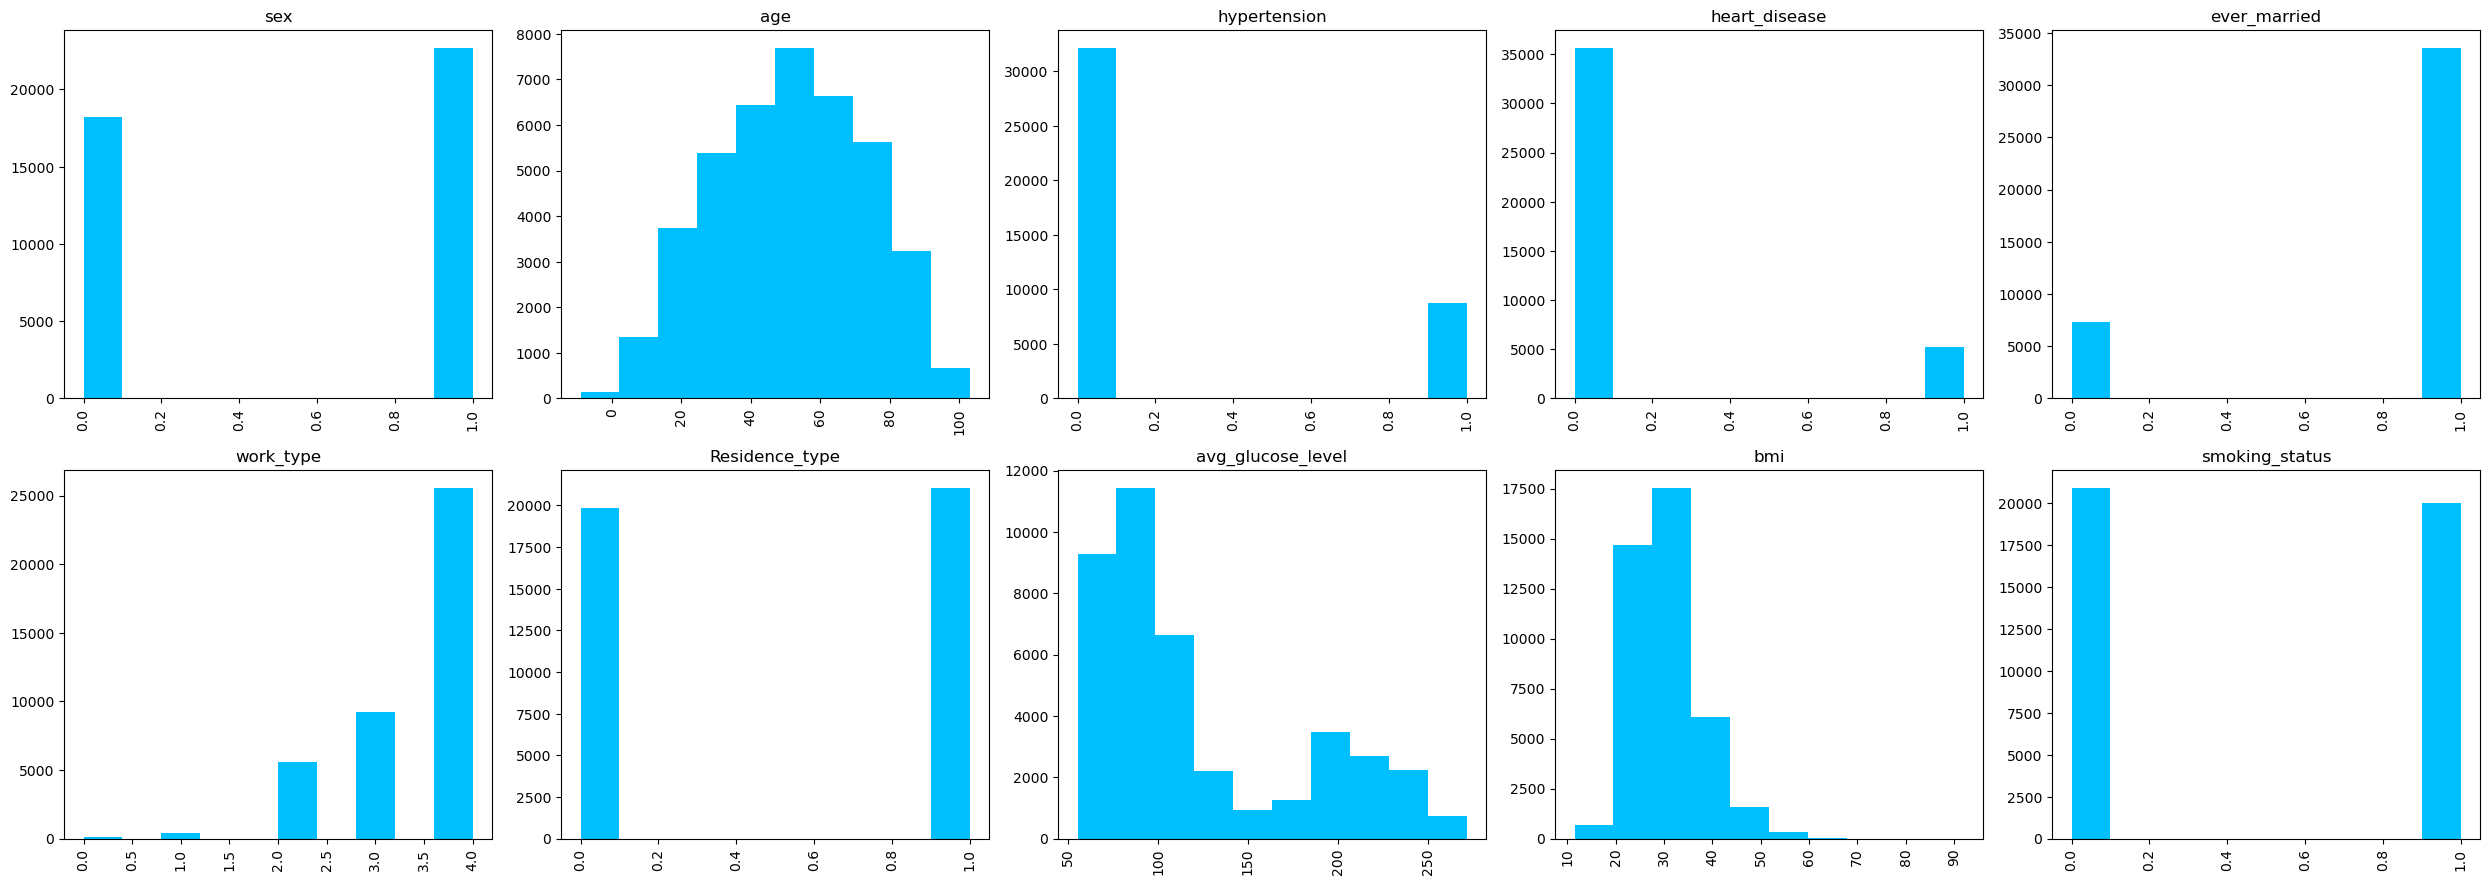

In [8]:
feature_cols = [x for x in df.columns if x not in 'stroke']
plt.figure(figsize=(25,35))
# loop for subplots
for i in range(len(feature_cols)):
    plt.subplot(8,5,i+1)
    plt.title(feature_cols[i])
    plt.xticks(rotation=90)
    plt.hist(df[feature_cols[i]],color = "deepskyblue")
    
plt.tight_layout()

In [9]:
df.drop(columns = ['ever_married'], axis = 1, inplace = True)

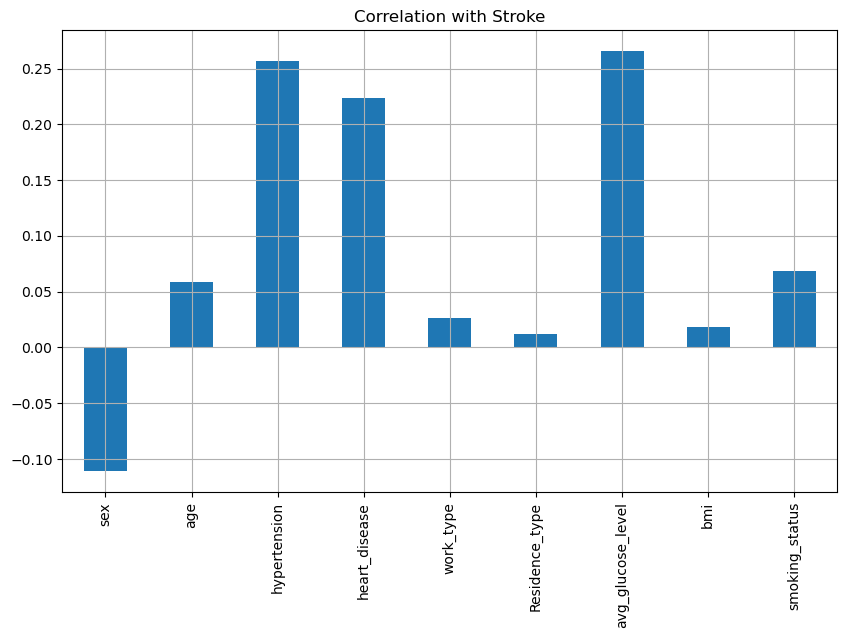

In [10]:
df.drop('stroke', axis=1).corrwith(df.stroke).plot(kind='bar', grid=True, figsize=(10, 6), title="Correlation with Stroke");

<AxesSubplot:>

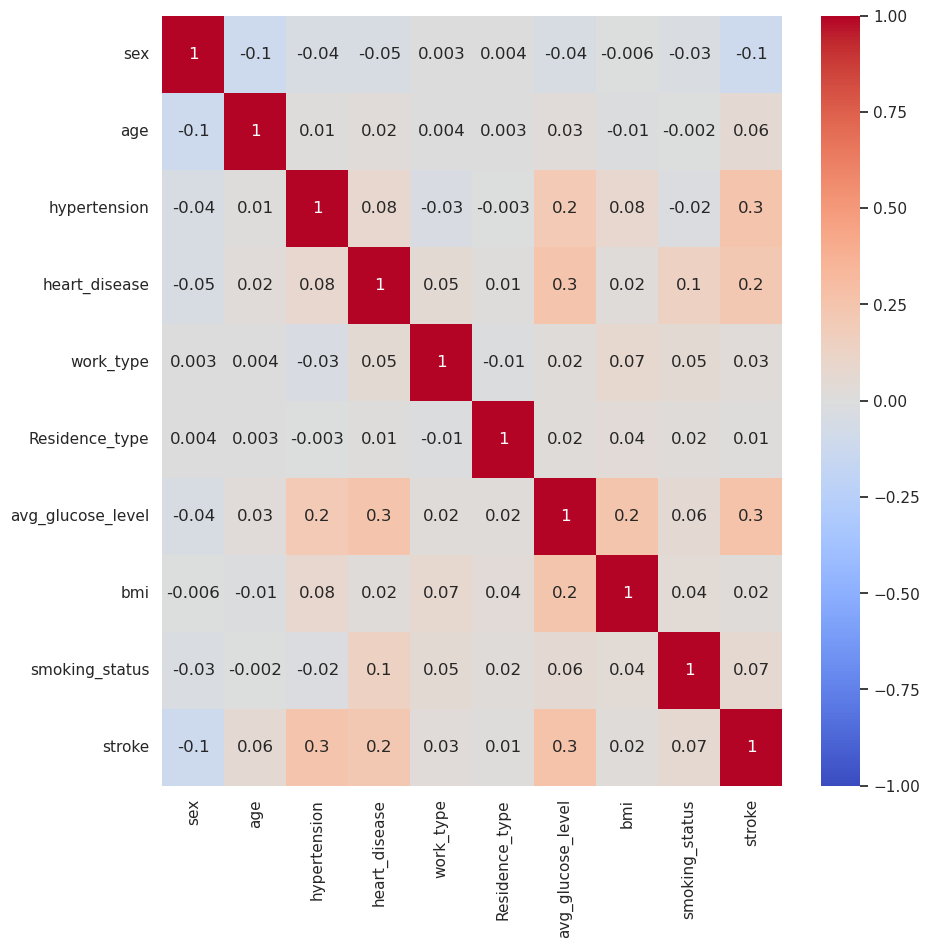

In [11]:
sns.set(rc = {'figure.figsize':(10,10)})
sns.heatmap(df.corr(),vmin=-1, vmax=1, annot = True, fmt='.1g',cmap= 'coolwarm')

In [12]:
df.drop(columns = ['age', 'work_type', 'Residence_type', 'bmi', 'smoking_status'], axis = 1, inplace = True)

In [13]:
df.head()

,sex,hypertension,heart_disease,avg_glucose_level,stroke
0,1.0,0,1,228.69,1
1,1.0,0,1,105.92,1
2,0.0,0,0,171.23,1
3,1.0,1,0,174.12,1
4,1.0,0,0,186.21,1


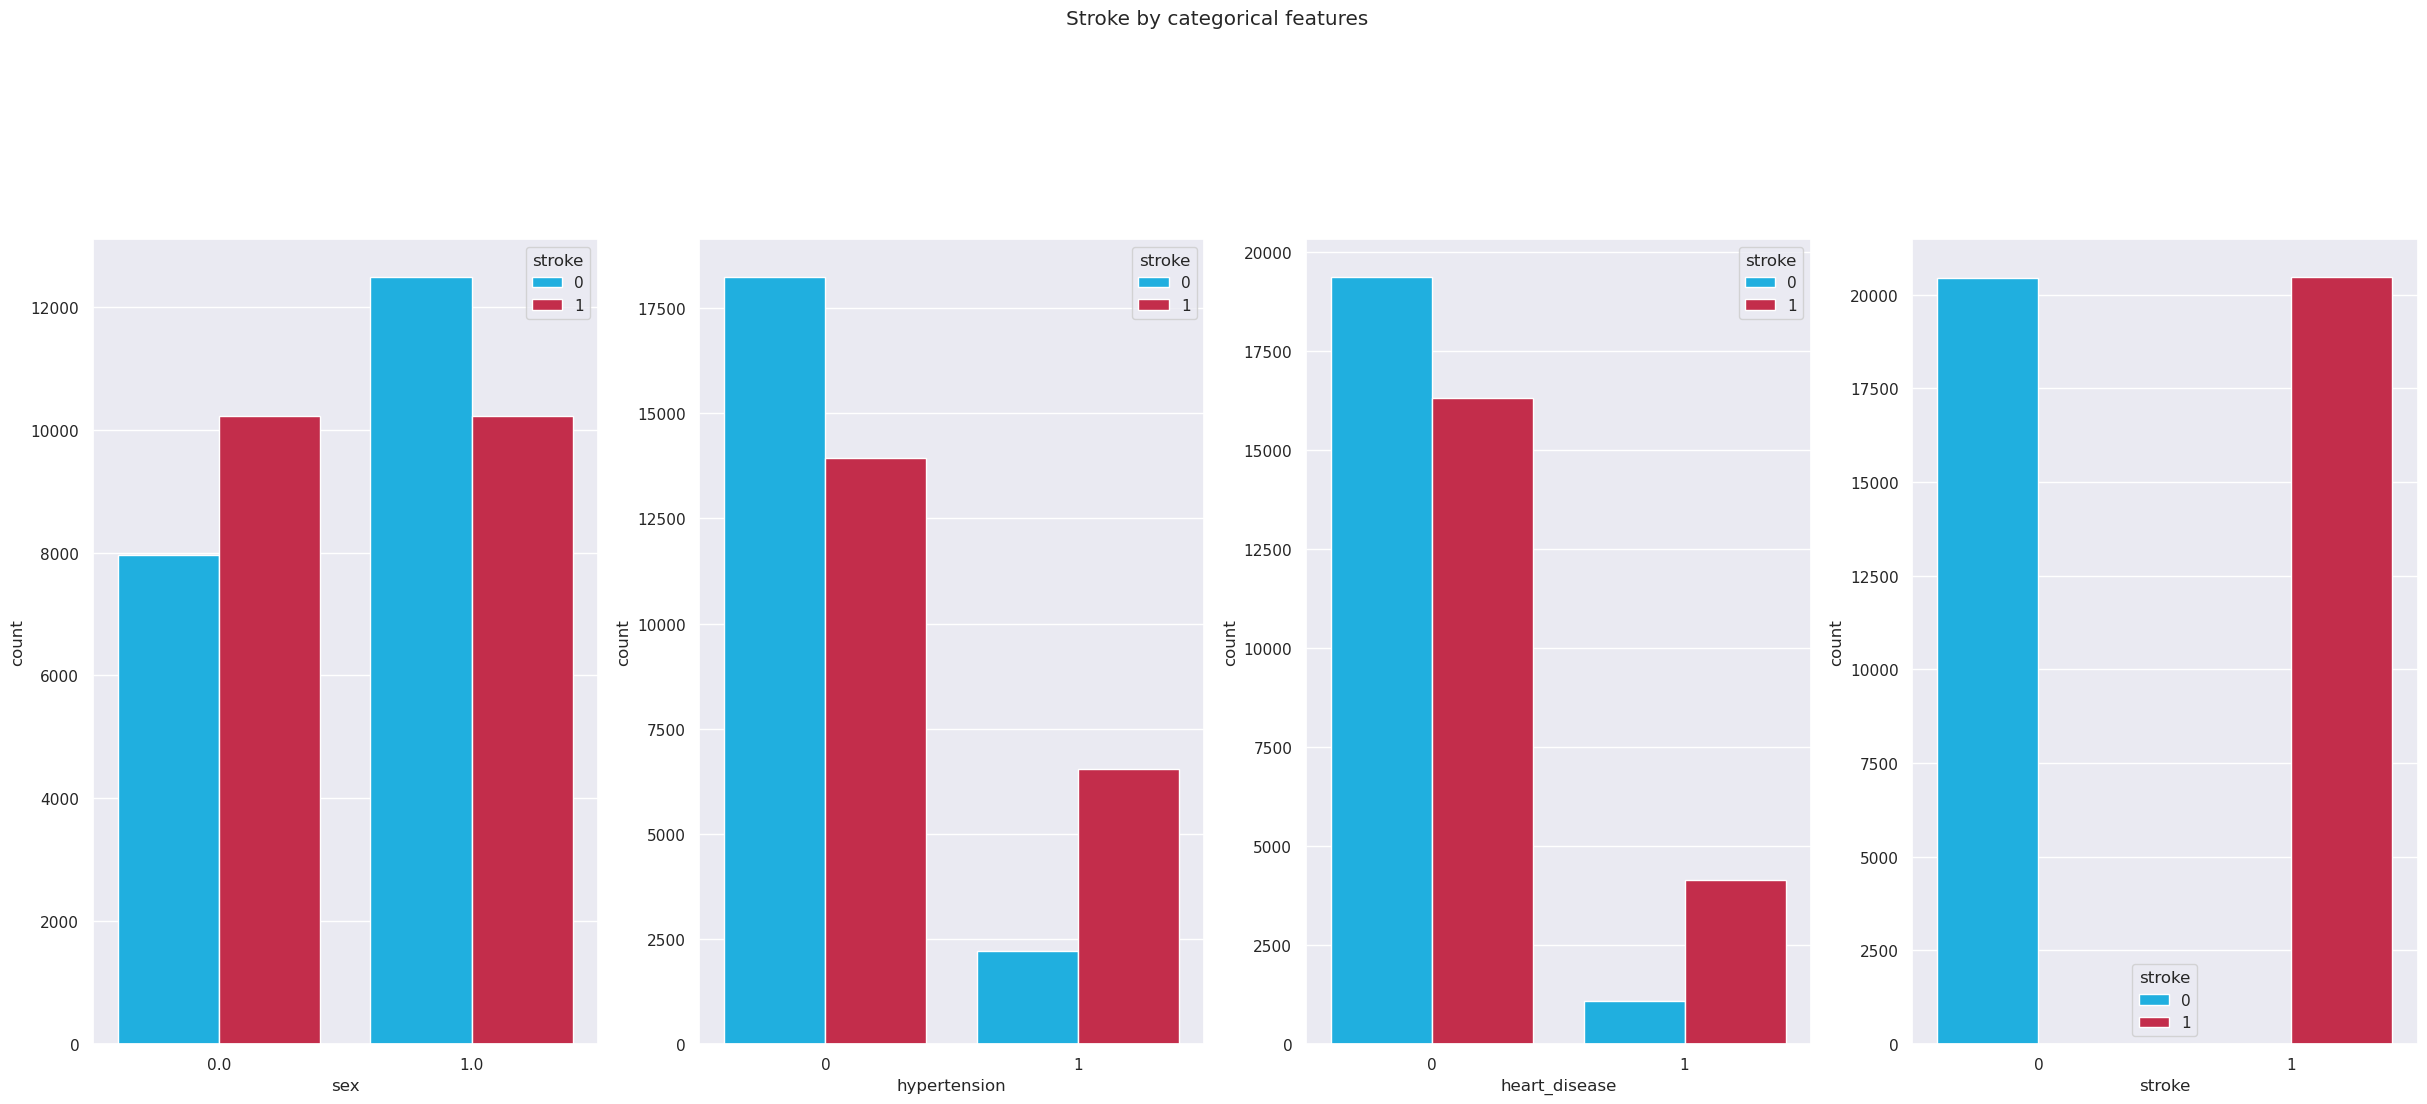

In [14]:
features = [x for x in df.columns if x != 'avg_glucose_level']
plt.figure(figsize = (30,23))
plt.suptitle('Stroke by categorical features')

#subplots
for i in enumerate(features):
    plt.subplot(2,4, i[0]+1)   
    x = sns.countplot(data=df, x=i[1], hue='stroke', palette = ['deepskyblue','crimson'])

<Figure size 1200x500 with 0 Axes>

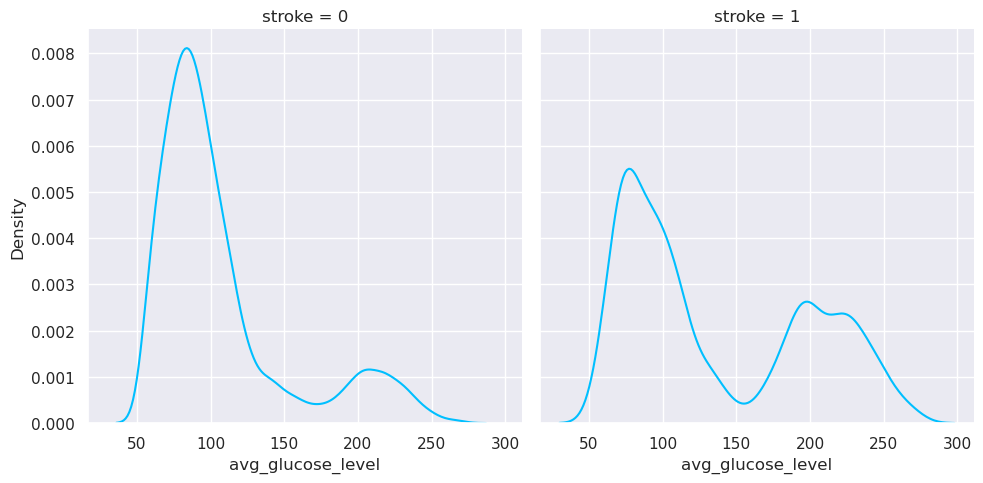

In [15]:
plt.figure(figsize=(12,5))
sns.displot(x='avg_glucose_level', col='stroke' , data = df, kind="kde" ,color = 'deepskyblue')

## Data Transformation

In [19]:
df_skew = df[['avg_glucose_level']]
skew = pd.DataFrame(df_skew.skew())
skew.columns = ['skew']
skew['too_skewed'] = skew['skew'] > .75
skew

,skew,too_skewed
avg_glucose_level,0.945128,True


In [20]:
mms = MinMaxScaler()
df[['avg_glucose_level']] = mms.fit_transform(df[['avg_glucose_level']])
df.head()

,sex,hypertension,heart_disease,avg_glucose_level,stroke
0,1.0,0,1,0.801265,1
1,1.0,0,1,0.234512,1
2,0.0,0,0,0.536008,1
3,1.0,1,0,0.549349,1
4,1.0,0,0,0.605161,1


In [21]:
df_skew = df[['avg_glucose_level']]
skew = pd.DataFrame(df_skew.skew())
skew.columns = ['skew']
skew['too_skewed'] = skew['skew'] > .75
skew

,skew,too_skewed
avg_glucose_level,0.945128,True


In [22]:
#use quantile tranformation

qt = QuantileTransformer(n_quantiles=500, output_distribution='normal')
df[['avg_glucose_level']] = qt.fit_transform(df[['avg_glucose_level']])

In [23]:
df_skew = df[['avg_glucose_level']]
skew = pd.DataFrame(df_skew.skew())
skew.columns = ['skew']
skew['too_skewed'] = skew['skew'] > .75
skew

,skew,too_skewed
avg_glucose_level,0.269603,False


In [26]:
columns_with_nan = df.columns[df.isna().any()].tolist()
print(columns_with_nan)

['sex']


In [27]:
df = df.dropna(how='any')

## Feature Selection

In [28]:
y = (df['stroke']).astype(int)
X = df.loc[:, df.columns != 'stroke']

[0.01091543 0.06508835 0.04806353 0.87593269]


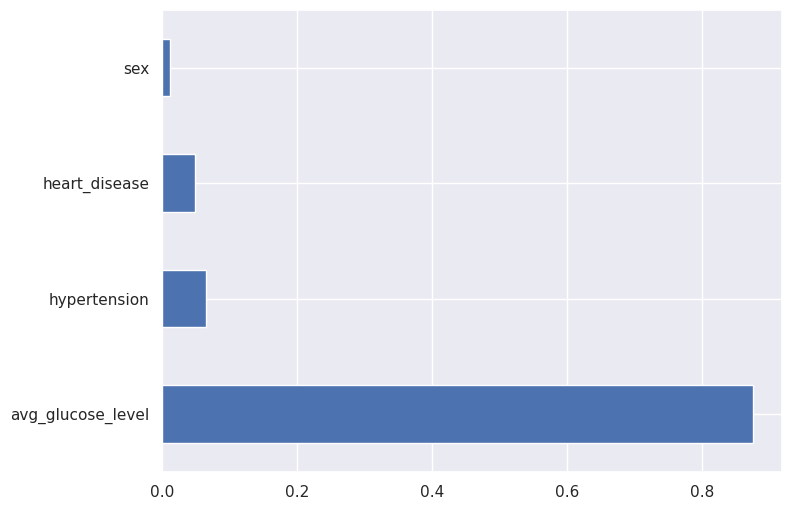

In [29]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(8,6))
feat_importances.nlargest(6).plot(kind='barh')
plt.show()

In [34]:
xgbc = xgb.XGBClassifier(random_state = 42)
# Create an EFS object
efs = EFS(estimator=xgbc,       
          min_features=1,      
          max_features=4,      
          scoring='accuracy',  
          cv=4)               

# Train EFS with our dataset
efs = efs.fit(X, y)
# Print the results
print('Best accuracy score: %.2f' % efs.best_score_) # best_score_ shows the best score 
print('Best subset (indices):', efs.best_idx_)       # best_idx_ shows the index of features that yield the best score 
print('Best subset (corresponding names):', efs.best_feature_names_)

Features: 15/15

Best accuracy score: 0.99
Best subset (indices): (0, 1, 2, 3)
Best subset (corresponding names): ('sex', 'hypertension', 'heart_disease', 'avg_glucose_level')


## Model building and testing

In [36]:
y = (df['stroke']).astype(int)
X = df.loc[:, df.columns != 'stroke']  # everything except "stroke"
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
xgbc = xgb.XGBClassifier()

params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}
search = RandomizedSearchCV(xgbc, param_distributions=params,
                            random_state = 42, n_iter = 200, cv = 4,
                            verbose = 1, n_jobs = -1, return_train_score = True)
  
search.fit(X_train, y_train)
print(search.best_params_)

Fitting 4 folds for each of 200 candidates, totalling 800 fits
{'colsample_bytree': 0.8045997961875188, 'gamma': 0.04808827554571038, 'learning_rate': 0.31215697934688114, 'max_depth': 5, 'n_estimators': 138, 'subsample': 0.9746919954946938}


In [39]:
y_pred_test = search.predict(X_test)
y_pred_train = search.predict(X_train)

In [40]:
print(accuracy_score(y_train, y_pred_train))
print(accuracy_score(y_test, y_pred_test))

0.9832017880840959
0.9820744724191314


<Figure size 500x500 with 0 Axes>

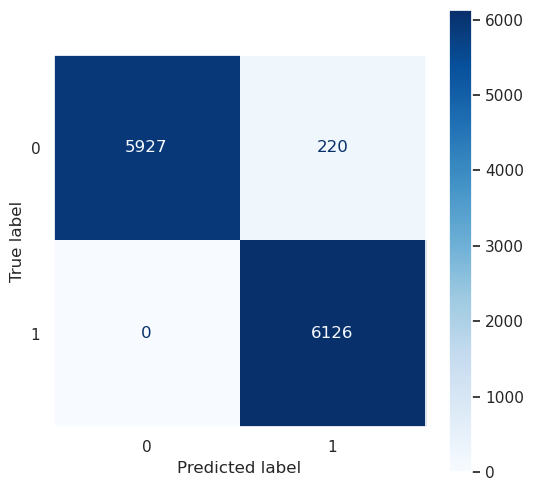

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_test, labels=search.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=search.classes_)
fig = plt.figure(figsize=(5, 5))
disp.plot(cmap=plt.cm.Blues) 
plt.grid(which='major')     #remove cell gridlines
plt.gcf().set_size_inches(6, 6)   # Adjust the size of the plot
plt.show()

In [45]:
resultsXGB = train_evaluate_model(y_test)
resultsXGB.index = ['XGBoostClassifier']
resultsXGB.style.background_gradient(cmap = sns.color_palette("blend:red,green", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy,auc
XGBoostClassifier,0.982074,0.982360,0.965332,1.000000,0.982105,0.982105


**Analysis by Adikhan Tuichiyev**

---
Appreciation to Olusola Fajobi